<a href="https://colab.research.google.com/github/schen8180/sophiac.github.io/blob/gh-pages/Sophia_Chen_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Q1: You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/2 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

#### Answer: The probability that it's raining in Boston is around 0.87

In [12]:
import numpy as np 
import random

In [23]:
CDF = norm.cdf

In [ ]:
def monte_carlo_friends(n):
  #what is the prob that the friends are being honest and that there is no rain
  friends_honest_norain = 0 
  #what is the prob that the friends are lying(by saying there is no rain) but there is rain
  friends_lying_norain = 0 
  #what is the prob that there is real rain
  friend_4 = ["truth","truth","truth","lie"] #friend3 and friend4 both have 1/4 chance of lying
  friend_3 = ["truth","truth","truth","lie"]
  friend_1 = ["truth","lie"]#friend1 and friend2 both have 1/2 chance of lying
  friend_2 = ["truth","lie"]

  for i in range(n): 
    friend1_ans = np.random.choice(friend_1)
    friend2_ans = np.random.choice(friend_2)
    friend3_ans = np.random.choice(friend_3)
    friend4_ans = np.random.choice(friend_4)

    if (friend1_ans == "truth") & (friend2_ans == "truth") & (friend3_ans == "truth") & (friend4_ans == "truth"):
      friends_honest_norain += 1
    else: 
      friends_lying_norain += 1
  print('the probability that friends are honest and there is no rain: ' + str(friends_honest_norain/n))
  print('the probability that friends are not honest by lying to you that there is no rain when there is actual rain: ' + str(friends_lying_norain/n))
  #what is the probability that there is rain actually raining in boston and that your friends are lying to you? 

In [ ]:
monte_carlo_friends(1000)

the probability that friends are honest and there is no rain: 0.134
the probability that friends are not honest by lying to you that there is no rain when there is actual rain: 0.866


#### Q2: Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

#### Answer: Mad Max should start toward Nashville

In [ ]:
def monte_carlo_mad_max(n): 
  witch_possible_routes_at = ['at_sl', 'at_no'] #possible routes that the witch could block for Atlanta 
  witch_possible_routes_nv = ['nv_no','nv_sl'] #possible routes that the witch could block for Nashville 

  location = np.random.choice(['at','nv'])
  random.choice(location)

  counter_at = 0 
  counter_at_sl = 0
  counter_at_no = 0

  counter_nv = 0
  counter_nv_no = 0 
  counter_nv_sl = 0

  for i in range(n): 

    if (location == 'at'): #if the location in toward atlanta 
      counter_at += 866 
      witch_possible_routes_at = np.random.choice(['at_sl', 'at_no']) #witch will block out of these these two atlanta paths 
      if (witch_possible_routes_at == 'at_sl'): #if the witch blocks out at_sl
        counter_at_no +=  470 + counter_at
      else: 
        counter_at_sl +=  555 + counter_at
    else: #if the location in toward nashville 
      counter_nv += 900
      witch_possible_routes_nv = np.random.choice(['nv_no','nv_sl'])#witch will block out of these these two nashville paths 
      if (witch_possible_routes_nv == 'nv_no'): #if the witch blocks out nv_no
        counter_nv_sl += counter_nv + 309 
      else:
        counter_nv_no += counter_nv + 532 
    print("the distance to travel on Atlanta and New Orleans Route is: "+ str(counter_at_no/n))
    print("the distance to travel on Atlanta and St Louis Route is: "+ str(counter_at_sl/n))
    print("the distance to travel on Nashville and St Louis Route is: "+str(counter_nv_sl/n))
    print("the distance to travel on Nashville and St Louis Route is: "+str(counter_nv_no/n))

#### Q3: Simulate a population of 20000 individuals from a beta distribution that has the parametrization a=1.6 and b=2.1. Select 400 simple random samples of size 32 from this population and show that the sample means are normally distributed by using histograms, distributional plots, Quantile-Quantile plots and normality tests.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
from scipy.stats import ksone
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [9]:
x =  stats.beta.rvs(size=20000,a=1.6, b=2.1)

In [10]:
ss = StandardScaler()
xs = ss.fit_transform(x.reshape(-1,1)) #standardized x 

In [14]:
random_sample_means = [np.mean(np.random.choice(x,size=32,replace=True,p=None)) for i in range(400)]

In [15]:
random_sample_means = [np.mean(np.random.choice(x,size=32,replace=True,p=None)) for i in range(400)]

In [16]:
rsm = np.array(random_sample_means)

In [17]:
s_rsm = ss.fit_transform(rsm.reshape(-1,1))

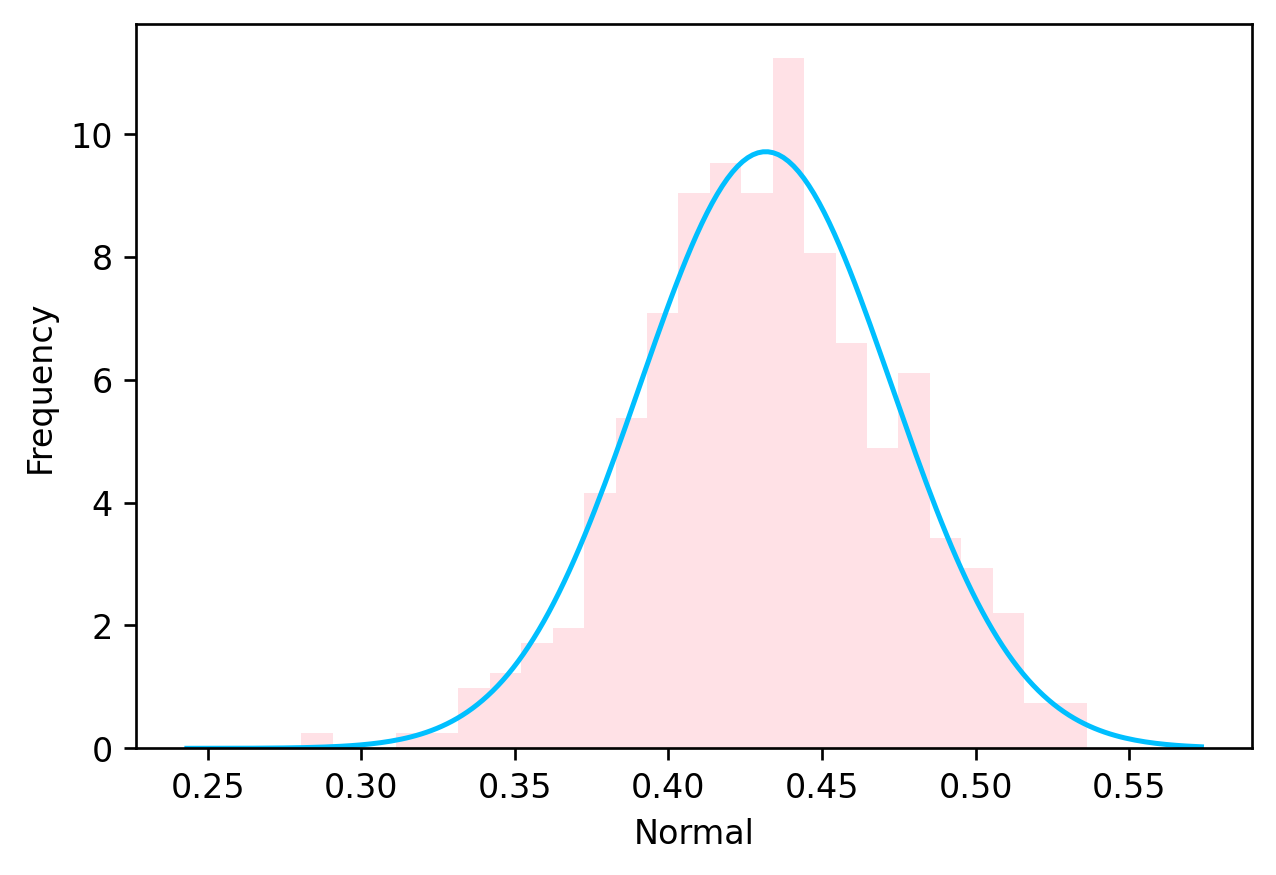

In [18]:
ax = sns.distplot(rsm, 
                  bins = 25,
                  kde = False,
                  color = 'deepskyblue',
                  hist_kws = {"color":"lightpink"},
                  fit = stats.norm,
                  fit_kws = {"color": 'deepskyblue'})
ax.set(xlabel='Normal', ylabel='Frequency')
plt.show()

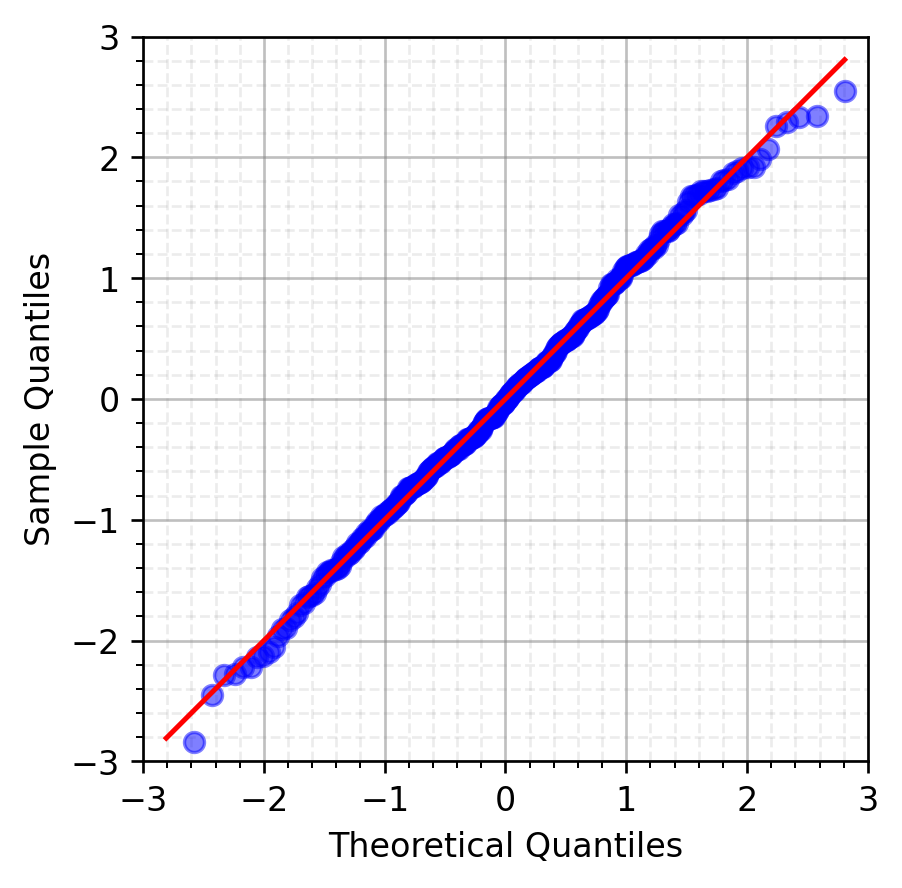

In [19]:
rsm = random_sample_means
#using Q-Q plots to show a normal distribution 
sm.qqplot((rsm-np.mean(rsm))/np.std(rsm), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [20]:
def zscore(rsm):
  return (rsm-np.mean(rsm))/np.std(rsm)

In [27]:
#Using Normality Tests 
#Test1 - The Kolmogorov - Smirnov Test 
def test_ks(rsm):
  n = len(rsm)
  rsm_sorted = np.sort(rsm)
  d = 0.0
  for i in range(n):
    if d < np.max([CDF(rsm_sorted[i])-i/n,(i+1)/n-CDF(rsm_sorted[i])]):
      d = np.max([CDF(rsm_sorted[i])-i/n,(i+1)/n-CDF(rsm_sorted[i])])
  return d

In [28]:
test_ks(zscore(rsm)) #test stat is close to 0, we can fail to reject

0.023819000745992303

In [29]:
stats.kstest(rsm,'norm') #This is a small p-value so we fail to reject the null hypothesis 
#The null hypothesis that this test normal,
#Thus this test shows that the data is normal 

KstestResult(statistic=0.6247679545488248, pvalue=2.3717993020416338e-151)

In [31]:
from scipy.stats import ksone

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

trials = range(1, 101)
alphas = [0.1, 0.05, 0.02, 0.01]

print('{:<6}|{:<6} Level of significance, alpha'.format(' ', ' '))
print('{:<6}|{:>8} {:>8} {:>8} {:>8}'.format(*['Trials'] + alphas))
print('-' * 42)

for t in trials:
    print('{:6d}|{:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f}'
          .format(*[t] + [ks_critical_value(t, a) for a in alphas]))
    if t % 10 == 0:
        print()

      |       Level of significance, alpha
Trials|     0.1     0.05     0.02     0.01
------------------------------------------
     1| 0.95000  0.97500  0.99000  0.99500
     2| 0.77639  0.84189  0.90000  0.92929
     3| 0.63604  0.70760  0.78456  0.82900
     4| 0.56522  0.62394  0.68887  0.73424
     5| 0.50945  0.56328  0.62718  0.66853
     6| 0.46799  0.51926  0.57741  0.61661
     7| 0.43607  0.48342  0.53844  0.57581
     8| 0.40962  0.45427  0.50654  0.54179
     9| 0.38746  0.43001  0.47960  0.51332
    10| 0.36866  0.40925  0.45662  0.48893

    11| 0.35242  0.39122  0.43670  0.46770
    12| 0.33815  0.37543  0.41918  0.44905
    13| 0.32549  0.36143  0.40362  0.43247
    14| 0.31417  0.34890  0.38970  0.41762
    15| 0.30397  0.33760  0.37713  0.40420
    16| 0.29472  0.32733  0.36571  0.39201
    17| 0.28627  0.31796  0.35528  0.38086
    18| 0.27851  0.30936  0.34569  0.37062
    19| 0.27136  0.30143  0.33685  0.36117
    20| 0.26473  0.29408  0.32866  0.35241

    21| 0

In [ ]:
ks_critical_value(100,0.5)

0.08163379591770001

In [ ]:
#Test2 - The Anderson-Darling Test: 
stats.anderson(rsm,'norm')
#Fail to reject the null hypothesis, so the normaility assumption is not violated 

AndersonResult(statistic=0.5728007862155096, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [32]:
stats.anderson(zscore(rsm),'norm')
#Fail to reject the null hypothesis, so the normaility assumption is not violated 

AndersonResult(statistic=0.2522867192923286, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))